In [74]:
# importing function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
# loading dataset
crop = pd.read_csv("D:\project\Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [76]:
crop.shape

(2200, 8)

In [77]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [78]:
crop.duplicated().sum()

0

In [79]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

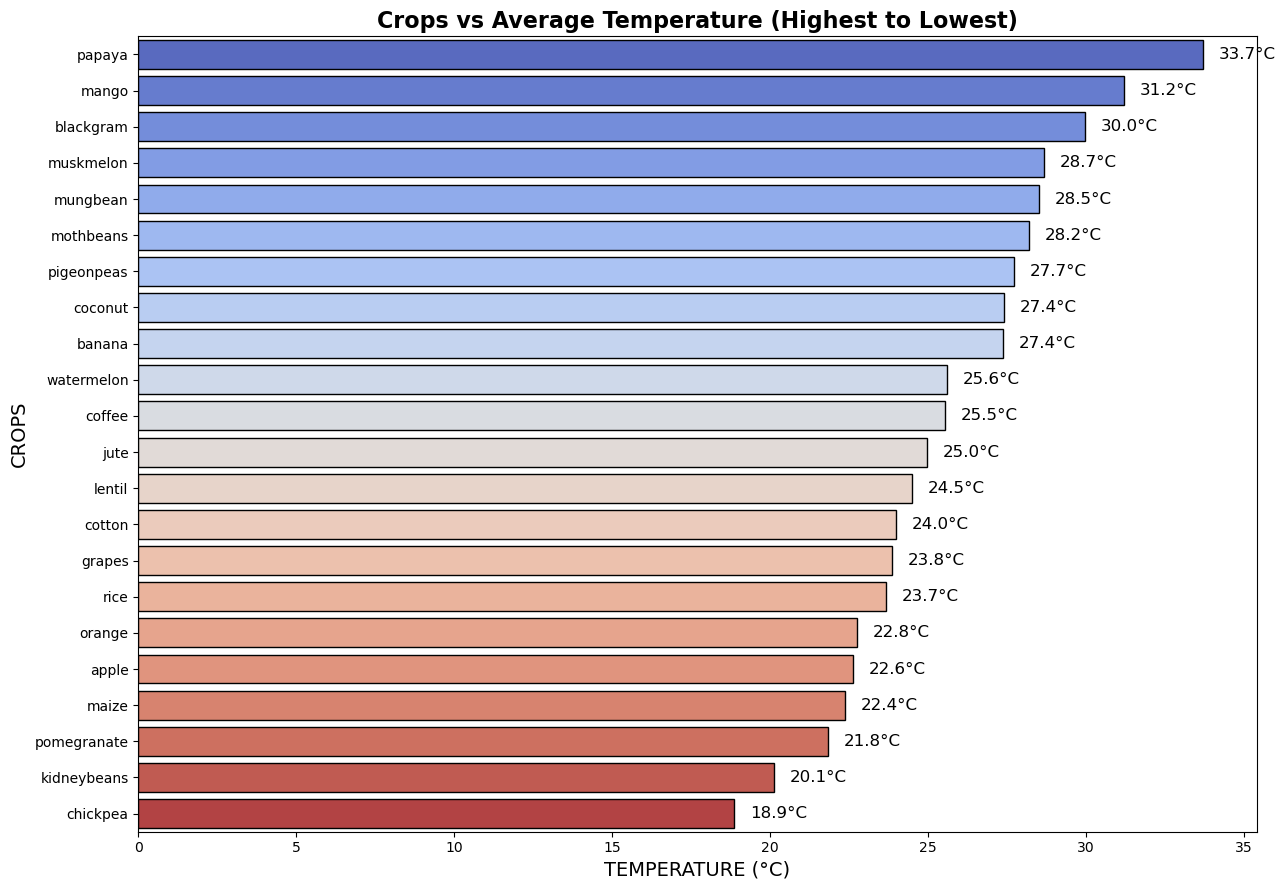

In [80]:
# Calculate average temperature for each crop
# Define the figure size
plt.figure(figsize=(13, 9))
# Create a bar plot
sns.barplot(
    x=average_temp.values, 
    y=average_temp.index, 
    palette="coolwarm", 
    edgecolor="black"
)
for index, value in enumerate(average_temp.values):
    plt.text(value + 0.5, index, f'{value:.1f}°C', va='center', color='black', fontsize=12)
    plt.title("Crops vs Average Temperature (Highest to Lowest)", fontsize=16, fontweight='bold')
plt.xlabel("TEMPERATURE (°C)", fontsize=14)
plt.ylabel("CROPS", fontsize=14)
plt.tight_layout()
plt.show()

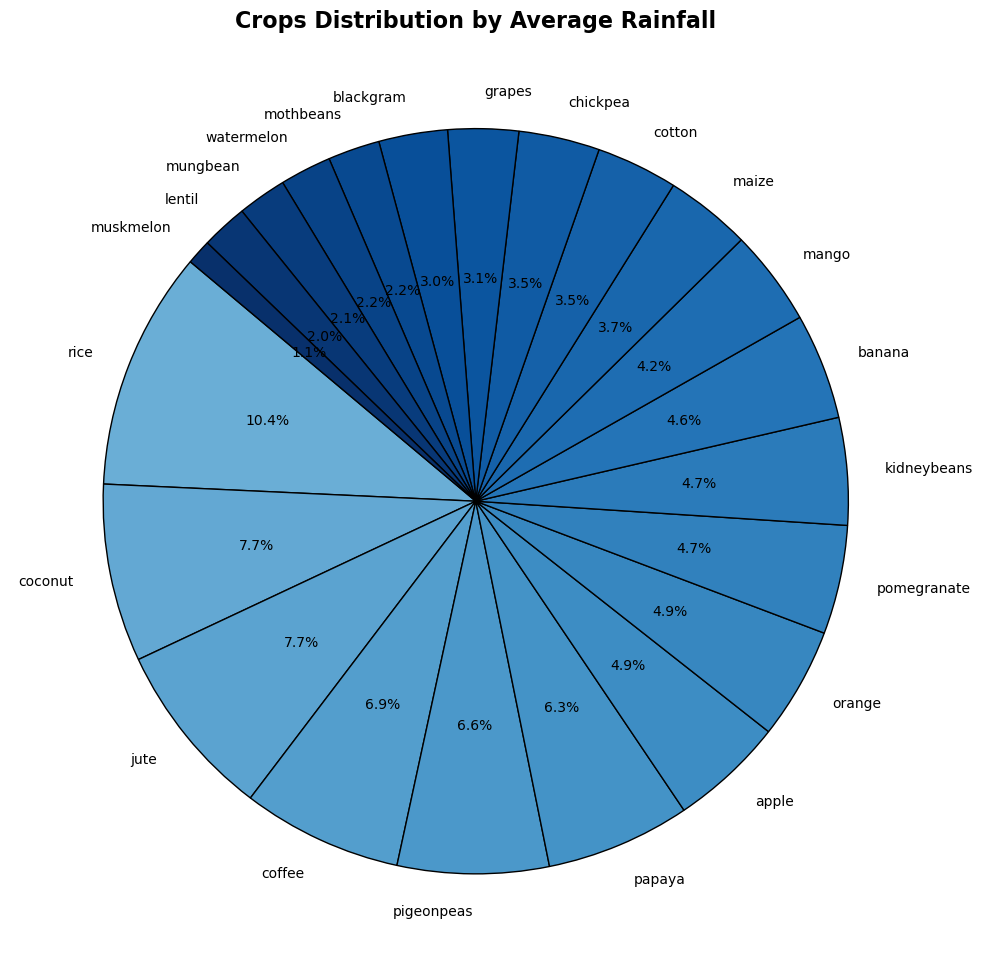

In [81]:
# Calculate average rainfall for each crop
average_rainfall = crop.groupby('label')['rainfall'].mean().sort_values(ascending=False)
# Define the figure size
plt.figure(figsize=(10, 10))
# Create a pie chart
colors = plt.cm.Blues(np.linspace(0.5, 1, len(average_rainfall)))
plt.pie(
    average_rainfall, 
    labels=average_rainfall.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 10}
)
# Add a title
plt.title("Crops Distribution by Average Rainfall", fontsize=16, fontweight='bold')
# Show the plot
plt.tight_layout()
plt.show()


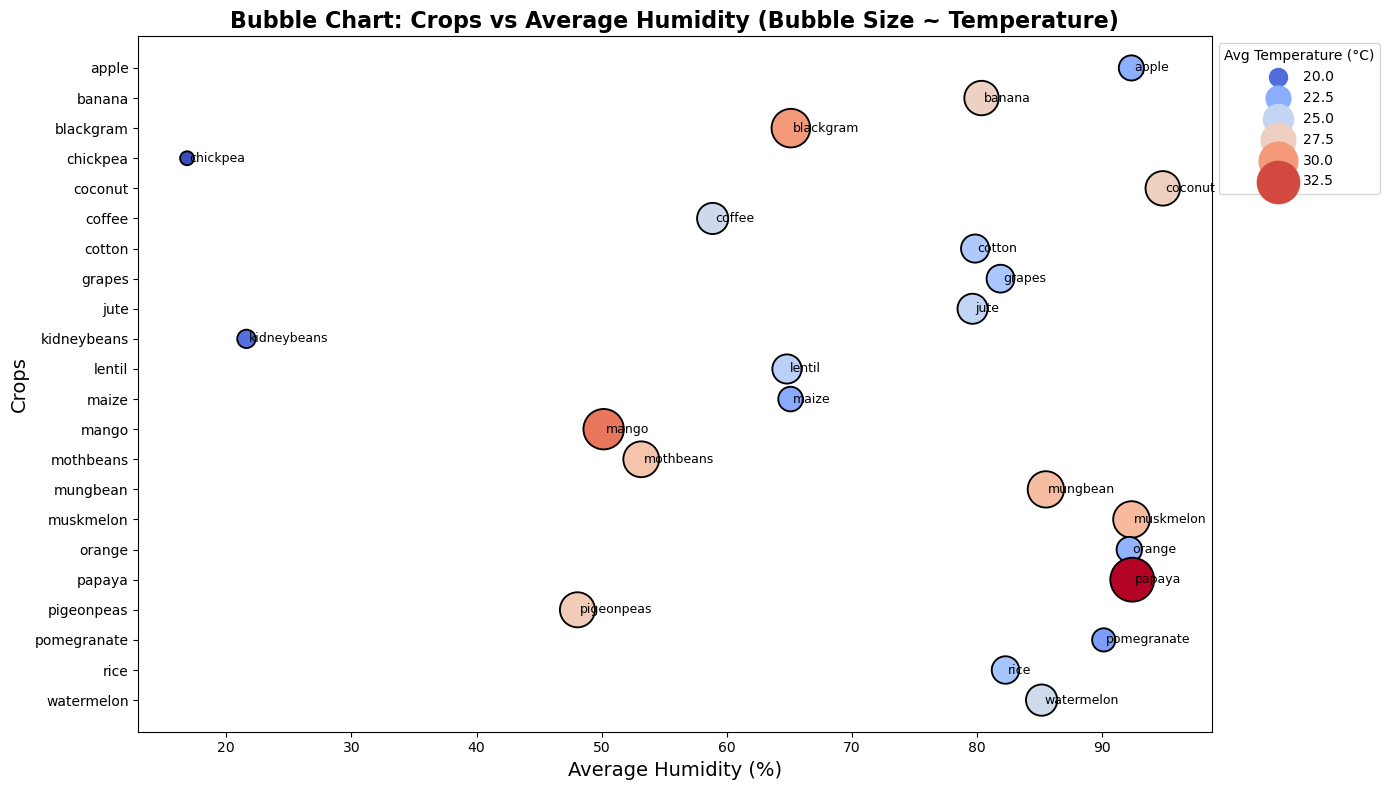

In [82]:
# Calculate the required averages
average_humidity = crop.groupby('label')['humidity'].mean()
average_temperature = crop.groupby('label')['temperature'].mean()

# Create a bubble chart
plt.figure(figsize=(14, 8))
bubble_sizes = average_temperature * 10  # Scale bubble sizes for better visualization
sns.scatterplot(
    x=average_humidity, 
    y=average_humidity.index, 
    size=average_temperature,
    sizes=(100, 1000),  # Adjust bubble size range
    hue=average_temperature,
    palette="coolwarm",
    edgecolor="black",
    legend="brief"
)

# Add annotations for crop names
for i, crop_name in enumerate(average_humidity.index):
    plt.text(average_humidity[i] + 0.2, i, crop_name, fontsize=9, va='center')

# Add labels and title
plt.title("Bubble Chart: Crops vs Average Humidity (Bubble Size ~ Temperature)", fontsize=16, fontweight='bold')
plt.xlabel("Average Humidity (%)", fontsize=14)
plt.ylabel("Crops", fontsize=14)
plt.legend(title="Avg Temperature (°C)", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [83]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num']=  crop['label'].map(crop_dict)

In [84]:
crop


,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,22


In [85]:
crop.drop(['label'],axis=1,inplace=True)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [86]:
X = crop.drop(['crop_num'],axis=1)
y = crop['crop_num']

In [87]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [88]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [90]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# create instances of all models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, model in models.items():
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")
    print("Confusion matrix : ",confusion_matrix(y_test,ypred))
    print("==========================================================")
    

Logistic Regression  with accuracy : 0.9204545454545454
Confusion matrix :  [[16  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  

In [92]:
# finally selected randomforest model

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred = rfc.predict(X_test)
accuracy_score(y_test,ypred)

0.9931818181818182

In [93]:
# or

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)
accuracy_score(y_test,ypred)


0.9704545454545455

In [94]:
# Reverse mapping for crop numbers to names
crop_reverse_dict = {v: k for k, v in crop_dict.items()}
crop_reverse_dict

{1: 'rice',
 2: 'maize',
 3: 'jute',
 4: 'cotton',
 5: 'coconut',
 6: 'papaya',
 7: 'orange',
 8: 'apple',
 9: 'muskmelon',
 10: 'watermelon',
 11: 'grapes',
 12: 'mango',
 13: 'banana',
 14: 'pomegranate',
 15: 'lentil',
 16: 'blackgram',
 17: 'mungbean',
 18: 'mothbeans',
 19: 'pigeonpeas',
 20: 'kidneybeans',
 21: 'chickpea',
 22: 'coffee'}

In [98]:
def predict_crop_with_models(N, P, K, temperature, humidity, ph, rainfall):
    # Prepare user input
    user_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    user_data_scaled = ms.transform(user_data)  # Scale the input

    # Predictions
    knn_prediction = knn.predict(user_data_scaled)
    rfc_prediction = rfc.predict(user_data_scaled)

    # Map predictions back to crop names
    knn_crop = crop_reverse_dict[int(knn_prediction[0])]
    rfc_crop = crop_reverse_dict[int(rfc_prediction[0])]

    return knn_crop, rfc_crop



# User input for testing
print("Enter the following details to predict the crop:")
N = float(input("Enter Nitrogen content (N): "))
P = float(input("Enter Phosphorous content (P): "))
K = float(input("Enter Potassium content (K): "))
temperature = float(input("Enter Temperature (°C): "))
humidity = float(input("Enter Humidity (%): "))
ph = float(input("Enter pH level: "))
rainfall = float(input("Enter Rainfall (mm): "))

# Get predictions from both models
knn_crop, rfc_crop = predict_crop_with_models(N, P, K, temperature, humidity, ph, rainfall)

# Display results
print(f"\nKNN Model Prediction: {knn_crop}")
print(f"RFC Model Prediction: {rfc_crop}")

Enter the following details to predict the crop:
Enter Nitrogen content (N): 82
Enter Phosphorous content (P): 18
Enter Potassium content (K): 48
Enter Temperature (°C): 29
Enter Humidity (%): 94
Enter pH level: 6
Enter Rainfall (mm): 26

KNN Model Prediction: muskmelon
RFC Model Prediction: muskmelon


C:\Users\Kisha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
